Shape of dataset: (1599, 12)

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5 

C:\Users\HP\AppData\Local\Temp\ipykernel_6096\2253608823.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette="Set2")


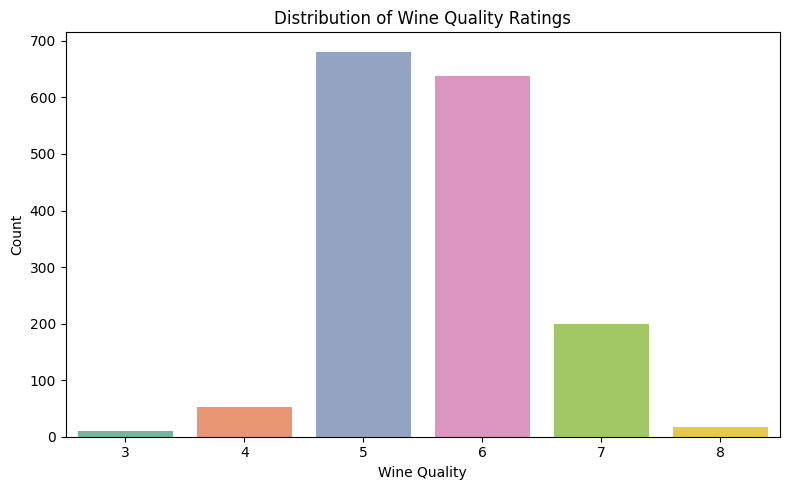

In [1]:
# wine_quality_analysis.py

# === Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === Load the Dataset ===
df = pd.read_csv("../winequality-red.csv")

# === Basic Exploration ===
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# === Distribution of Quality Ratings ===
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette="Set2")
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [2]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# === Load Data ===
df = pd.read_csv("../winequality-red.csv")

# === Prepare Data ===
X = df.drop('quality', axis=1)
y = df['quality']  # For simplicity, treat as multiclass classification

# Optionally, binarize or group quality for binary classification
# y = (df['quality'] >= 7).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Task 5.1: Basic Stacking ===
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

stack = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5, n_jobs=-1)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print("\n[5.1] Basic Stacking (LogisticRegression meta-learner):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# === Task 5.2: Compare Meta-Learners ===
meta_learners = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=50, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, meta in meta_learners.items():
    stack = StackingClassifier(estimators=base_learners, final_estimator=meta, cv=5, n_jobs=-1)
    stack.fit(X_train, y_train)
    y_pred = stack.predict(X_test)
    print(f"\n[5.2] Stacking with {name} as meta-learner:")
    print("Accuracy:", accuracy_score(y_test, y_pred))

# === Task 5.3: Advanced Stacking (5 base models) ===
base_learners_adv = base_learners + [
    ('knn', KNeighborsClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42))
]
# Use the best meta-learner from 5.2 (replace 'XGBoost' if another is best)
best_meta = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
stack_adv = StackingClassifier(estimators=base_learners_adv, final_estimator=best_meta, cv=5, n_jobs=-1)
stack_adv.fit(X_train, y_train)
y_pred_adv = stack_adv.predict(X_test)
print("\n[5.3] Advanced Stacking (5 base models):")
print("Accuracy:", accuracy_score(y_test, y_pred_adv))

# Compare with simple stack
stack_simple = StackingClassifier(estimators=base_learners, final_estimator=best_meta, cv=5, n_jobs=-1)
stack_simple.fit(X_train, y_train)
y_pred_simple = stack_simple.predict(X_test)
print("\n[5.3] Simple Stacking (3 base models):")
print("Accuracy:", accuracy_score(y_test, y_pred_simple))




[5.1] Basic Stacking (LogisticRegression meta-learner):
Accuracy: 0.66875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.72      0.72       136
           6       0.62      0.73      0.67       128
           7       0.69      0.55      0.61        40
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.64      0.67      0.65       320



c:\Users\HP\Downloads\Ensemble_Group_Lab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\Downloads\Ensemble_Group_Lab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\Downloads\Ensemble_Group_Lab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri


[5.2] Stacking with LogisticRegression as meta-learner:
Accuracy: 0.66875

[5.2] Stacking with RandomForest as meta-learner:
Accuracy: 0.66875


c:\Users\HP\Downloads\Ensemble_Group_Lab\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:27:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[5.2] Stacking with XGBoost as meta-learner:
Accuracy: 0.675


c:\Users\HP\Downloads\Ensemble_Group_Lab\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:27:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[5.3] Advanced Stacking (5 base models):
Accuracy: 0.671875


c:\Users\HP\Downloads\Ensemble_Group_Lab\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:28:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[5.3] Simple Stacking (3 base models):
Accuracy: 0.675
